In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from scipy import stats as stat
import time

testFile = 'bank_term_deposit.csv'

In [128]:
df = pd.read_csv(testFile, index_col=False)
print('log:', '{0} records has been read'.format(len(df.index)))

log: 4521 records has been read


In [129]:
df.head(10)

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no
5,NaN,management,single,tertiary,747.0,NaN,no,141.0,2,176,failure,no
6,36.0,self-employed,married,tertiary,37.0,yes,no,341.0,1,330,other,no
7,39.0,technician,married,secondary,147.0,yes,no,151.0,2,-1,unknown,no
8,41.0,entrepreneur,married,tertiary,221.0,yes,no,57.0,2,-1,unknown,no
9,43.0,services,married,primary,-88.0,yes,yes,313.0,1,147,failure,no


In [130]:
df.tail(10)

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
4511,46.0,blue-collar,married,secondary,668.0,yes,no,1263.0,2,-1,unknown,yes
4512,40.0,blue-collar,married,secondary,11.0,yes,no,660.0,2,-1,unknown,no
4513,49.0,blue-collar,married,secondary,322.0,no,no,356.0,2,-1,unknown,no
4514,38.0,blue-collar,married,secondary,125.0,yes,no,45.0,4,153,failure,no
4515,32.0,services,single,secondary,473.0,yes,no,624.0,5,-1,unknown,no
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no
4520,44.0,entrepreneur,single,tertiary,1136.0,yes,yes,345.0,2,249,other,no


In [131]:
df.describe()

,age,balance,duration,campaign,pdays
count,3984.000000,4164.000000,4388.000000,4521.000000,4521.000000
mean,41.617470,1136.750240,264.724020,2.793630,39.766645
std,10.696378,2726.204918,261.057119,3.109807,100.121124
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000
25%,32.000000,58.000000,104.000000,1.000000,-1.000000
50%,40.000000,316.000000,185.500000,2.000000,-1.000000
75%,49.000000,997.000000,331.000000,3.000000,-1.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


In [133]:
df['marital'].update(df['marital']
                      .apply(lambda x: 0 if x == 'single' else 1 if x == 'married' else 2 if x == 'divorced' else x))
df['education'].update(df['education']
                      .apply(lambda x: 0 if x == 'primary' else 1 if x == 'secondary' else 2 if x == 'tertiary' else 3 if x == 'unknown' else x))
df['housing'].update(df['housing']
                      .apply(lambda x: 0 if x == 'no' else 1 if x == 'yes' else x))
df['loan'].update(df['loan']
                      .apply(lambda x: 0 if x == 'no' else 1 if x == 'yes' else x))
df['poutcome'].update(df['poutcome']
                      .apply(lambda x: 0 if x == 'success' else 1 if x == 'failure' else 2 if x == 'other' else 3 if x == 'unknown' else x))
df['y'].update(df['y']
                      .apply(lambda x: 0 if x == 'no' else 1 if x == 'yes' else x))
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,1.0,0,1787.0,0.0,0,79.0,1,-1,3,0.0
1,33.0,services,1.0,1,4789.0,1.0,1,NaN,1,339,1,0.0
2,NaN,management,0.0,2,135.0,1.0,0,185.0,1,330,1,0.0
3,30.0,management,1.0,2,1476.0,1.0,1,199.0,4,-1,3,0.0
4,59.0,blue-collar,1.0,1,NaN,1.0,0,226.0,1,-1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,services,1.0,1,-333.0,1.0,0,329.0,5,-1,3,0.0
4517,57.0,self-employed,1.0,2,-3313.0,1.0,1,153.0,1,-1,3,0.0
4518,57.0,technician,1.0,1,295.0,0.0,0,151.0,11,-1,3,0.0
4519,28.0,blue-collar,1.0,1,1137.0,0.0,0,129.0,4,211,2,0.0


In [134]:
for col in df:
  print('number of nan values in column "{}" is {}'.format(col, df[col].isna().sum()))

number of nan values in column "age" is 537
number of nan values in column "job" is 0
number of nan values in column "marital" is 120
number of nan values in column "education" is 0
number of nan values in column "balance" is 357
number of nan values in column "housing" is 219
number of nan values in column "loan" is 0
number of nan values in column "duration" is 133
number of nan values in column "campaign" is 0
number of nan values in column "pdays" is 0
number of nan values in column "poutcome" is 0
number of nan values in column "y" is 434


In [135]:
ageAverage = df['age'].mean()
df['age'].update(np.where(pd.isna(df['age']), ageAverage, df['age']))

In [136]:
balanceAverage = df['balance'].mean()
df['balance'].update(np.where(pd.isna(df['balance']), balanceAverage, df['balance']))

In [137]:
durationAverage = df['duration'].mean()
df['duration'].update(np.where(pd.isna(df['duration']), durationAverage, df['duration']))

In [138]:
maritalMode = df['marital'].mode()
df['marital'].update(np.where(pd.isna(df['marital']), maritalMode, df['marital']))

In [139]:
housingMode = df['housing'].mode()
df['housing'].update(np.where(pd.isna(df['housing']), housingMode, df['housing']))

In [140]:
for col in df:
  print('number of nan values in column "{}" is {}'.format(col, df[col].isna().sum()))

number of nan values in column "age" is 0
number of nan values in column "job" is 0
number of nan values in column "marital" is 0
number of nan values in column "education" is 0
number of nan values in column "balance" is 0
number of nan values in column "housing" is 0
number of nan values in column "loan" is 0
number of nan values in column "duration" is 0
number of nan values in column "campaign" is 0
number of nan values in column "pdays" is 0
number of nan values in column "poutcome" is 0
number of nan values in column "y" is 434


In [141]:
target = pd.DataFrame(df[pd.isna(df['y'])])

the dataframe has been splitted into the actual data and the target ones

In [142]:
pd.value_counts(df['y'])

0.0    3623
1.0     464
Name: y, dtype: int64

In [143]:
pd.value_counts(df['housing'])

1.0    2654
0.0    1867
Name: housing, dtype: int64

In [144]:
df[(df['age'] > 35) & (df['campaign'] == 1) & (df['marital'] == 0)]
# df[np.logical_and(df['age'] > 35, np.logical_and(df['campaign'] == 1, df['marital'] == 0))]

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
2,41.61747,management,0.0,2,135.00000,1.0,0,185.0,1,330,1,0.0
58,36.00000,retired,0.0,1,11.00000,1.0,1,314.0,1,-1,3,0.0
101,38.00000,management,0.0,2,493.00000,1.0,0,553.0,1,367,1,NaN
104,41.61747,management,0.0,1,524.00000,0.0,0,9.0,1,-1,3,0.0
126,41.61747,unemployed,0.0,1,119.00000,0.0,0,51.0,1,-1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4396,41.00000,retired,0.0,0,1136.75024,0.0,0,239.0,1,368,1,0.0
4412,41.61747,management,0.0,2,2679.00000,1.0,0,195.0,1,-1,3,0.0
4434,41.61747,technician,0.0,1,175.00000,1.0,0,219.0,1,246,1,0.0
4457,37.00000,blue-collar,0.0,0,6969.00000,1.0,0,412.0,1,-1,3,0.0


In [145]:
startTime = time.time()

avg = df[df['education'] == 1]['balance'].mean()

stopTime = time.time()
print(avg, ':', 'processed in {:f}'.format(stopTime - startTime))

956.3408674526546 : processed in 0.000993


In [146]:
startTime = time.time()
s = 0
n = 0

# for i in range(df.index.size):
#   if df.iloc[i]['education'] == 1:
#     n += 1
#     s += df.iloc[i]['balance']

for i, row in df.iterrows():
  if row['education'] == 1:
    n += 1
    s += row['balance']
    
avg = s / n

stopTime = time.time()
print(avg, ':', 'processed in {:f}'.format(stopTime - startTime))

956.3408674526528 : processed in 0.169040


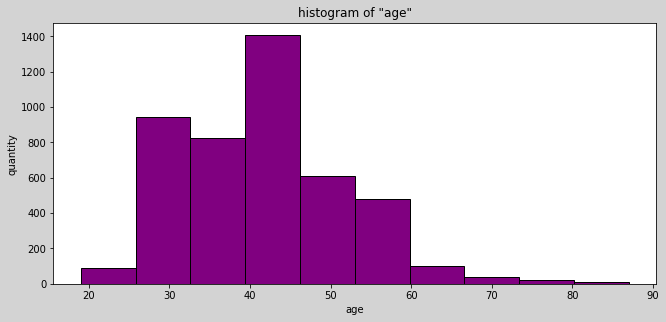

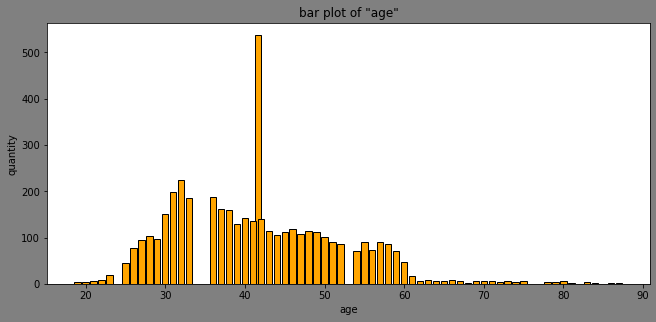

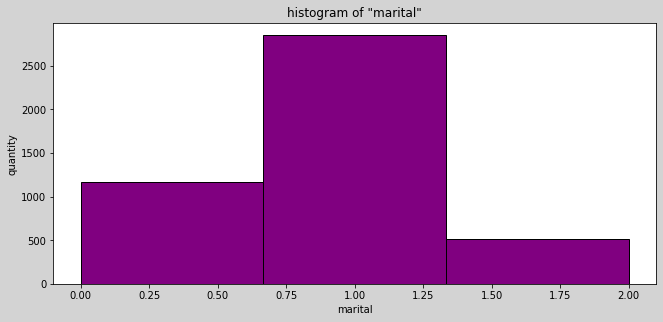

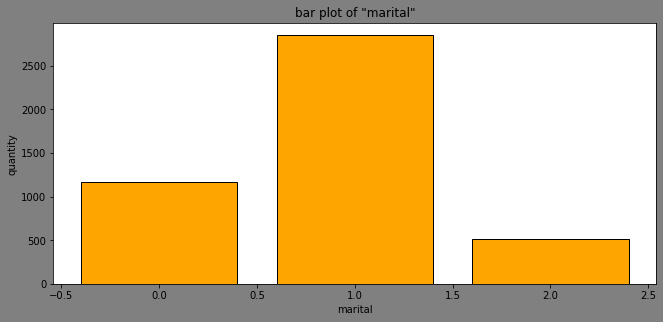

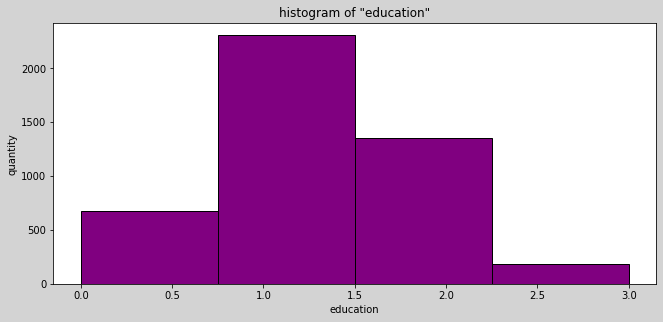

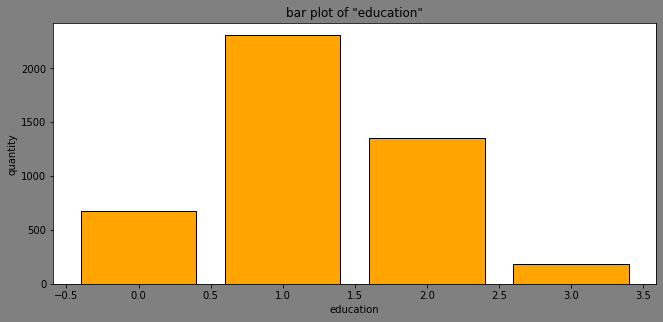

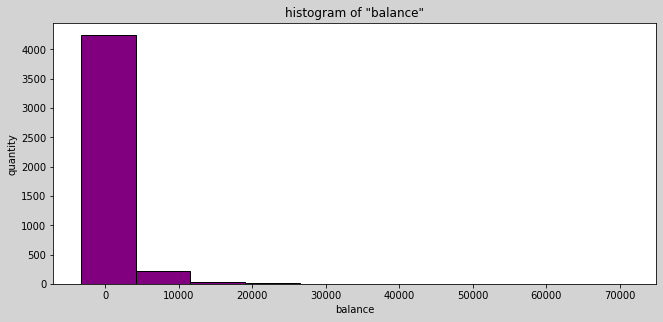

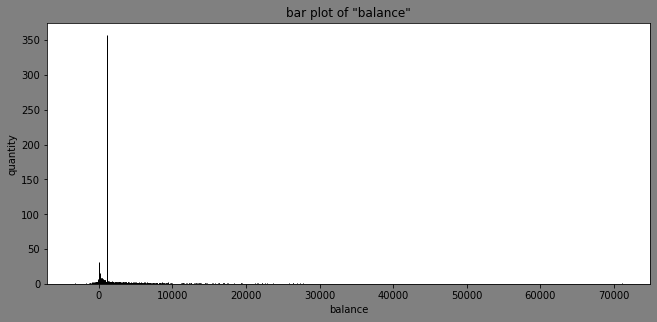

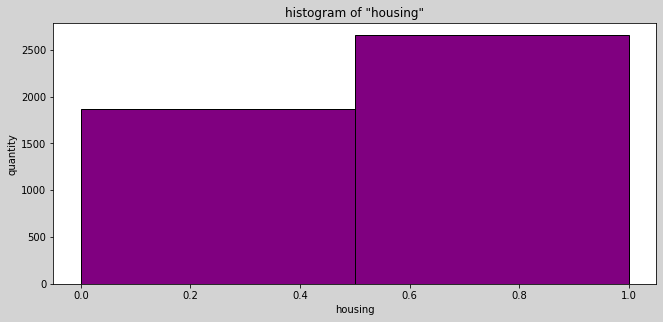

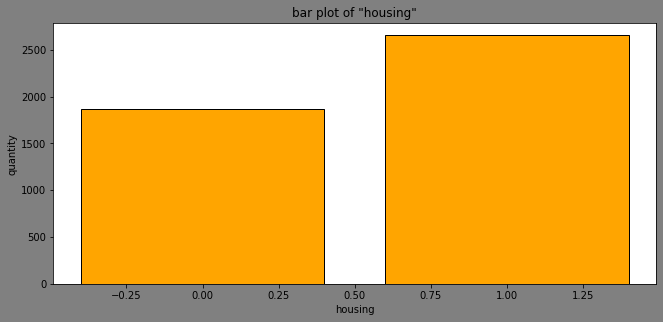

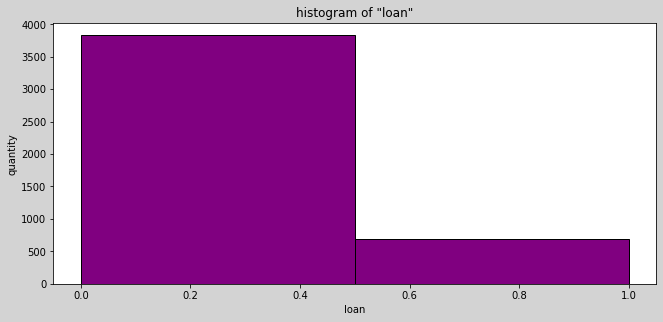

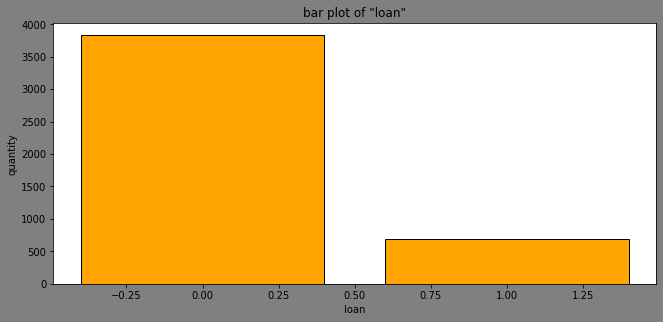

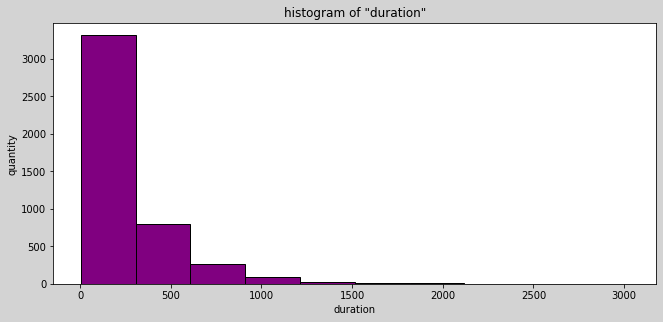

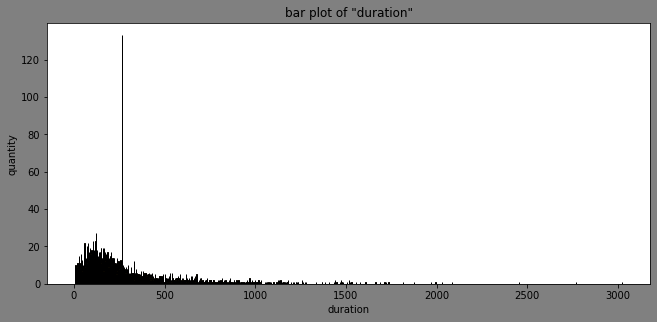

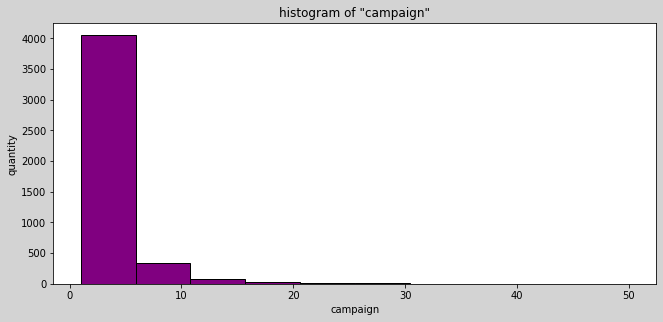

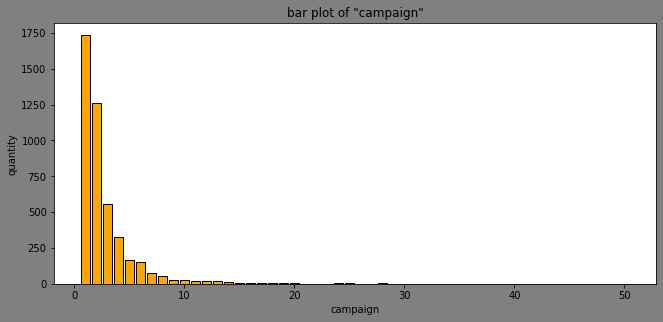

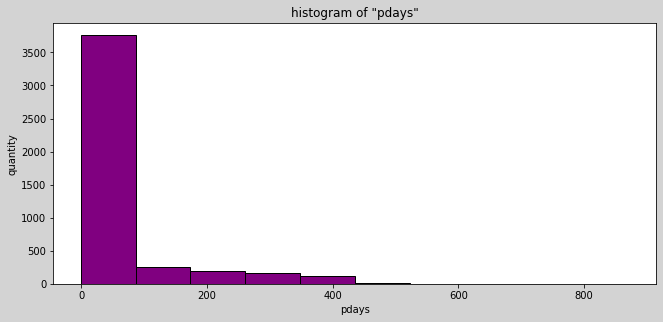

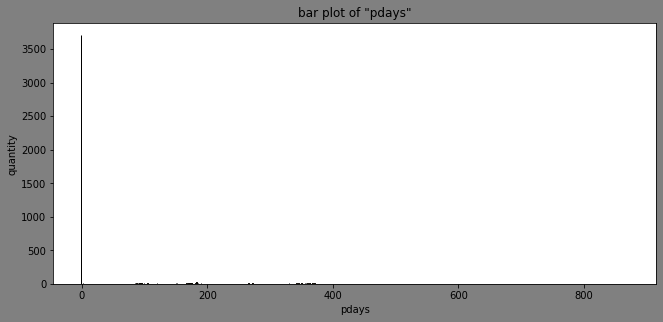

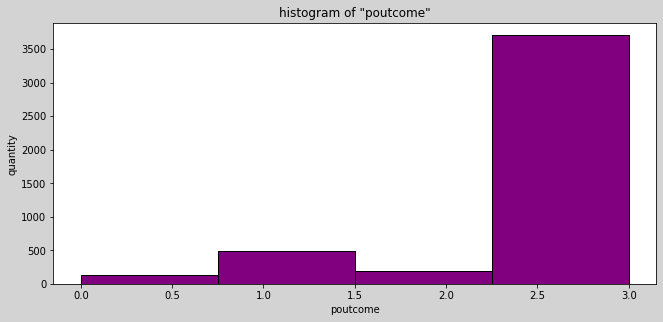

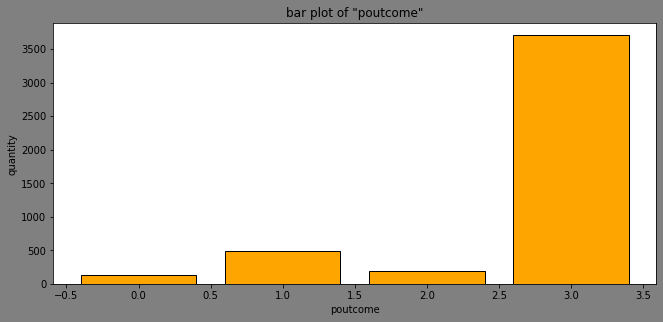

In [147]:
for col in df:
  if col == 'job' or col == 'y':
    continue
  
  plot.figure(
    figsize=[10.8, 4.8],
    facecolor='lightgrey'
    
  )
  plot.title('histogram of "{}"'.format(col))
  plot.xlabel(col)
  plot.ylabel('quantity')
  plot.hist(
            df[col], 
            color='purple', 
            edgecolor='black', 
            bins=min(10, df[col].value_counts().count()),
            histtype='bar')
  plot.show()
  
  plot.figure(
    figsize=[10.8, 4.8],
    facecolor='grey'
  )
  plot.title('bar plot of "{}"'.format(col))
  plot.xlabel(col)
  plot.ylabel('quantity')
  plot.bar(
            df[col].value_counts(sort=False).index,
            df[col].value_counts(sort=False).values,
            color='orange', 
            edgecolor='black')
  plot.show()

In [191]:
numericalColumns = ['age', 'balance', 'duration', 'pdays']
StandardizedData = pd.DataFrame(df[numericalColumns + ['y']])

for col in numericalColumns:
  if col == 'y':
    continue
  
  m = StandardizedData[col].mean()
  s = StandardizedData[col].std()
  StandardizedData[col].update((StandardizedData[col] - m) / s)
  
StandardizedData

,age,balance,duration,pdays,y
0,-1.157015,0.248535,-7.221342e-01,-0.407173,0.0
1,-0.858237,1.395944,2.210192e-16,2.988713,0.0
2,0.000000,-0.382884,-3.099838e-01,2.898822,0.0
3,-1.157015,0.129666,-2.555489e-01,-0.407173,0.0
4,1.731172,0.000000,-1.505672e-01,-0.407173,0.0
...,...,...,...,...,...
4516,-0.858237,-0.561760,2.499186e-01,-0.407173,0.0
4517,1.531987,-1.700760,-4.344066e-01,-0.407173,0.0
4518,1.531987,-0.321729,-4.421830e-01,-0.407173,0.0
4519,-1.356200,0.000095,-5.277237e-01,1.710262,0.0


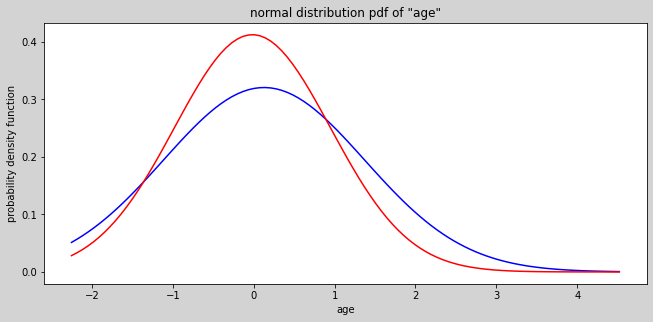

score of attribute "age" is 2909


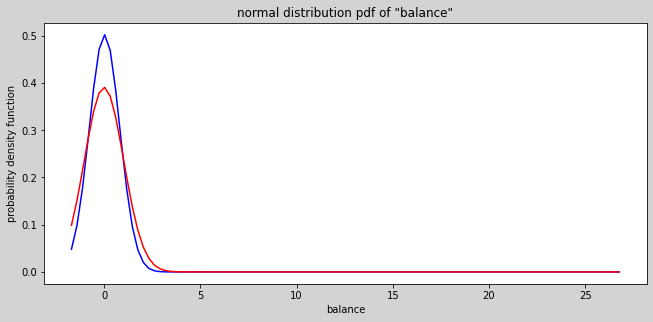

score of attribute "balance" is 684


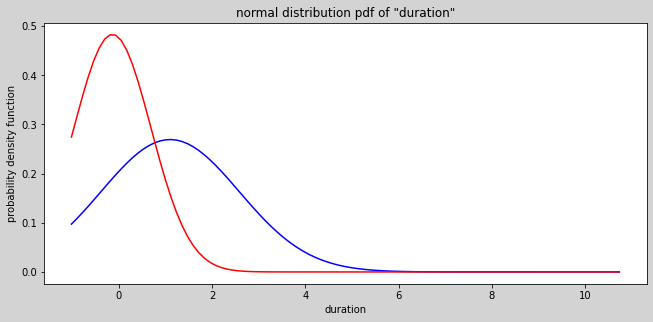

score of attribute "duration" is 3468


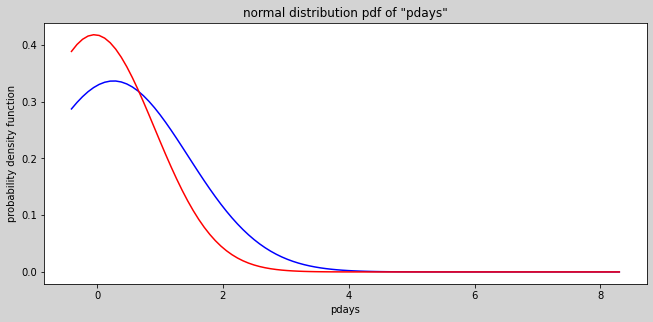

score of attribute "pdays" is 3239


In [214]:
for col in StandardizedData:
    if col == 'y':
        continue    
    
    plot.figure(
        figsize=[10.8, 4.8],
        facecolor='lightgrey' 
    )
    plot.title('normal distribution pdf of "{}"'.format(col))
    plot.xlabel(col)
    plot.ylabel('probability density function')
    x = np.linspace(StandardizedData[col].min(), StandardizedData[col].max(), 100)

    m1 = StandardizedData[StandardizedData['y'] == 1][col].mean()
    s1 = StandardizedData[StandardizedData['y'] == 1][col].std()
    plot.plot(
            x,
            stat.norm.pdf(x, loc=m1, scale=s1),
            color='blue',
            )

    m0 = StandardizedData[StandardizedData['y'] == 0][col].mean()
    s0 = StandardizedData[StandardizedData['y'] == 0][col].std()
    plot.plot(
            x,
            stat.norm.pdf(x, loc=m0, scale=s0),
            color='red',
            )
    plot.show()
    
    print('score of attribute "{}" is {}'
            .format(col, 
                    len(StandardizedData[StandardizedData['y'] == (stat.norm.pdf(StandardizedData[col], loc=m1, scale=s1) > stat.norm.pdf(StandardizedData[col], loc=m0, scale=s0))])))